<a href="https://colab.research.google.com/github/genealston/googlecolab/blob/main/tfdf_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Tensorflow Decision Forest Model & Results

res ipsa loquitor


In [1]:
!pip install --q pandas
!pip install --q gdown
!pip install --q tensorflow tensorflow_decision_forests
!pip install --q matplotlib
!pip install --q dtreeviz
#!pip install --q shap

import os  
import numpy as np 
import pandas as pd
import tensorflow as tf 
import math
import datetime as dt
import random
#import shap

from keras import models
from keras import layers
from tensorflow.keras import initializers

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import dtreeviz

# Decision Tree with Random Forest
import tensorflow_decision_forests as tfdf
import tensorflow_datasets as tfds

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 3.9 MB/s eta 0:00:00
Found TensorFlow Decision Forests v1.3.0


In [2]:
# Download training and test Pandas datasets 
!gdown 'https://drive.google.com/uc?id=1EJd9uH-AE0TAVOtn_fyzuw5l8fpyJW-j'
!gdown 'https://drive.google.com/uc?id=1z7Fe0DEuDYSnrkIyO_l-J8WCpxPmO5cO'
!gdown 'https://drive.google.com/uc?id=1COQxHqpW1VqkuYJ_Tkh9nNTe1T0ZYUvg'

Downloading...
From: https://drive.google.com/uc?id=1EJd9uH-AE0TAVOtn_fyzuw5l8fpyJW-j
To: /content/crime_train.pkl
100% 721M/721M [00:03<00:00, 232MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z7Fe0DEuDYSnrkIyO_l-J8WCpxPmO5cO
To: /content/crime_test.pkl
100% 192M/192M [00:01<00:00, 131MB/s]
Downloading...
From: https://drive.google.com/uc?id=1COQxHqpW1VqkuYJ_Tkh9nNTe1T0ZYUvg
To: /content/Decision_Forest.png
100% 402k/402k [00:00<00:00, 133MB/s]


In [3]:
# Unpickle file and cast datatypes to supported int size for Tensorflow Decision Forest
crime_test = pd.read_pickle('/content/crime_test.pkl') 
crime_train = pd.read_pickle('/content/crime_train.pkl') 
crime_train = crime_train.astype('int64')
crime_test = crime_test.astype('int64')

#Get the Number of Features in our Model for Input Layer
input_length = crime_train.shape[1]-1
print("The Number of features in the training data is", input_length) 

#Calculate the number of classes for outcomes for output layer
ouput_legnth = crime_train['force_outcome'].nunique()
print("The Number of classes in our output data is", ouput_legnth)

The Number of features in the training data is 1734
The Number of classes in our output data is 4


In [4]:
#Define the target column and create TensorFlow datasets
target = 'force_outcome'
train_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(crime_train, label=target, task=tfdf.keras.Task.CLASSIFICATION)
test_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(crime_test, label=target, task=tfdf.keras.Task.CLASSIFICATION)

In [5]:
# do some file clean up to save RAM
del crime_test

In [6]:
# instantiate the model
model_rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)

# optional step - add evaluation metrics
model_rf.compile(metrics=["mse", "mape"])

# fit the model
# "sys_pipes" is optional and it enables the display of the training logs
with sys_pipes():
  model_rf.fit(x=train_tfds)

#model_rf.fit(x=train_tfds)

Use /tmp/tmpp7je5fe3 as temporary training directory
Reading training dataset...


2023-04-16 03:54:22.637093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1075' with dtype int64 and shape [399201]
	 [[{{node Placeholder/_1075}}]]


Training dataset read in 0:10:25.477544. Found 399201 examples.
Training model...


[INFO 23-04-16 04:44:30.8278 UTC kernel.cc:1242] Loading model from path /tmp/tmpp7je5fe3/model/ with prefix 6be7366f68b443ba
[INFO 23-04-16 04:44:37.3645 UTC decision_forest.cc:660] Model loaded with 300 root(s), 236054 node(s), and 676 input feature(s).
[INFO 23-04-16 04:44:37.3646 UTC abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-04-16 04:44:37.3664 UTC kernel.cc:1074] Use fast generic engine


Model trained in 0:39:53.900444
Compiling model...


2023-04-16 04:44:41.988812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_91' with dtype int64 and shape [399201]
	 [[{{node Placeholder/_91}}]]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


# Evaluation

In [7]:
model_rf.compile(metrics=["accuracy","mae","acc","mse"])
evaluation = model_rf.evaluate(test_tfds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

107/107 [==============================] - 148s 1s/step - loss: 0.0000e+00 - accuracy: 0.9922 - mae: 0.2871 - acc: 0.9922 - mse: 0.3041

loss: 0.0000
accuracy: 0.9922
mae: 0.2871
acc: 0.9922
mse: 0.3041


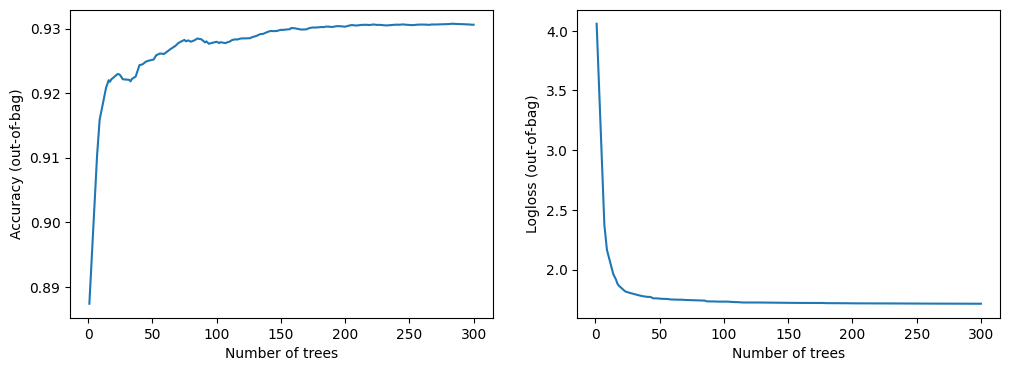

In [8]:
# plot the RMSE during training 
logs = model_rf.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

107/107 [==============================] - 146s 1s/step


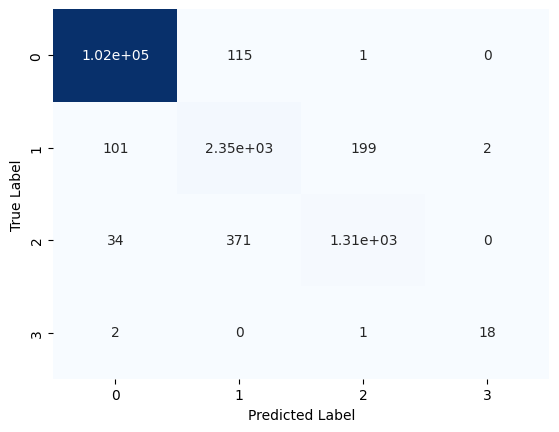

In [9]:
# Create a confusion matrix as a 2D array to evaluate Decision Forest model
labels_tfds = np.concatenate([y for x, y in test_tfds], axis=0)
predictions_tfds = np.argmax(model_rf.predict(test_tfds),axis=-1)
confusion_matrix = tf.math.confusion_matrix(labels_tfds, predictions_tfds)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=np.unique(labels_tfds), yticklabels=np.unique(labels_tfds), cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [10]:
# Build recall metrics table from Decision Forest model Confusion Matrix 

# Calculate recall on 0 class
TP_0 = confusion_matrix[0,0]
FP_0 = np.sum(confusion_matrix[:,0]) - TP_0
FN_0 = np.sum(confusion_matrix[0,])- TP_0
TN_0 = np.sum(confusion_matrix) - (FP_0 + FN_0 + TP_0)
Recall_0 = float(TP_0 / (TP_0 + FN_0))

# Calculate recall on 1 class
TP_1 = confusion_matrix[1,1]
FP_1 = np.sum(confusion_matrix[:,1]) - TP_1
FN_1 = np.sum(confusion_matrix[1,])- TP_1
TN_1 = np.sum(confusion_matrix) - (FP_1 + FN_1 + TP_1)
Recall_1 = float(TP_1 / (TP_1 + FN_1))

# Calculate recall on 2 class
TP_2 = confusion_matrix[2,2]
FP_2 = np.sum(confusion_matrix[:,2]) - TP_2
FN_2 = np.sum(confusion_matrix[2,])- TP_2
TN_2 = np.sum(confusion_matrix) - (FP_2 + FN_2 + TP_2)
Recall_2 = float(TP_2 / (TP_2 + FN_2))

# Calculate recall on 3 class
TP_3 = confusion_matrix[3,3]
FP_3 = np.sum(confusion_matrix[:,3]) - TP_3
FN_3 = np.sum(confusion_matrix[3,])- TP_3
TN_3 = np.sum(confusion_matrix) - (FP_3 + FN_3 + TP_3)
Recall_3 = float(TP_3 / (TP_3 + FN_3))

Recall_List = [Recall_0,Recall_1,Recall_2,Recall_3]
Recall_Results = pd.DataFrame(Recall_List,index = ['Class 0','Class 1','Class 2','Class 3'],columns=['Recall'])
Recall_Results

,Recall
Class 0,0.998862
Class 1,0.886209
Class 2,0.763435
Class 3,0.857143


# Interpretation

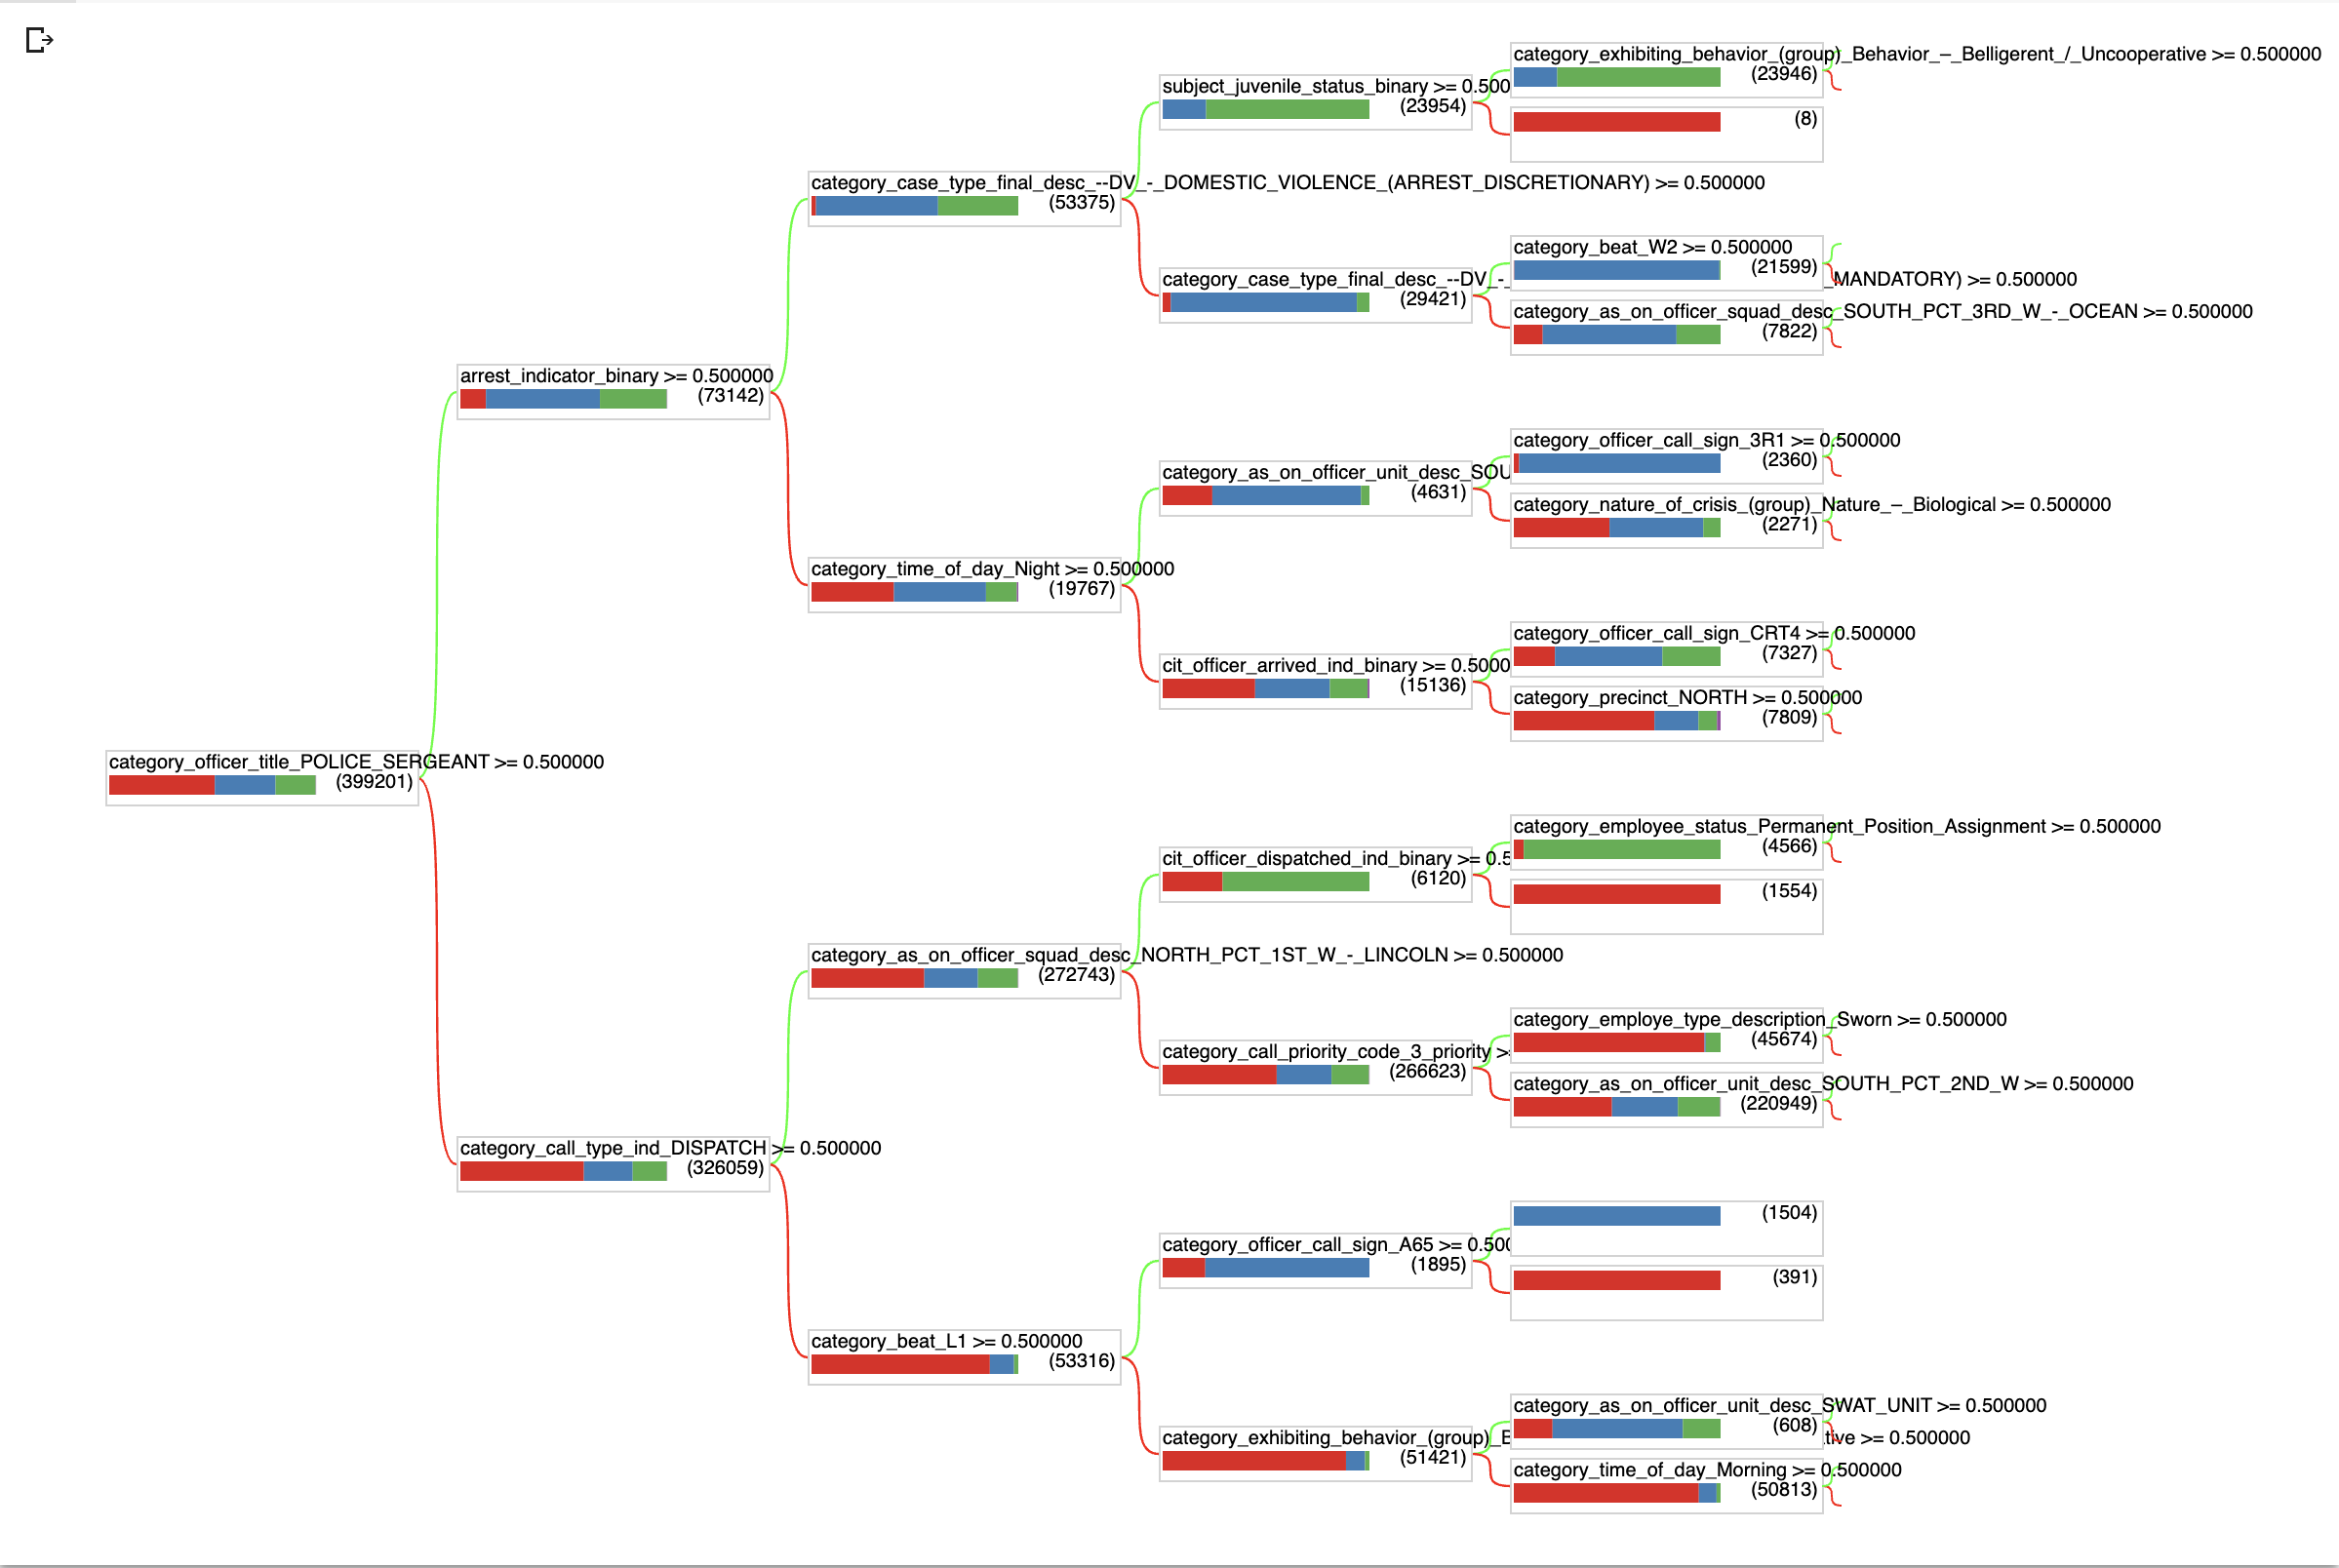

In [11]:
# plot the first tree, restricted to depth of 3
#tfdf.model_plotter.plot_model_in_colab(model_rf, tree_idx=0, max_depth=4)
from IPython.display import Image
Image('/content/Decision_Forest.png')

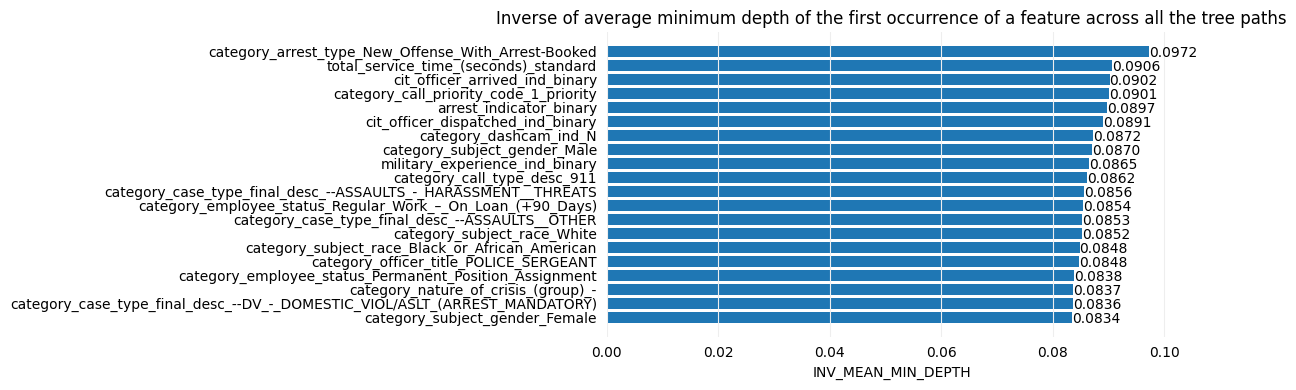

In [12]:
# Lets find out about the most important features
inspector = model_rf.make_inspector()
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "INV_MEAN_MIN_DEPTH"
variable_importances = inspector.variable_importances()[variable_importance_metric][:20]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("Inverse of average minimum depth of the first occurrence of a feature across all the tree paths")

# get rid of the frame and other labels
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False)

#plt.gca().axes.get_xaxis().set_visible(False)

plt.gca().xaxis.grid(True, color='#EEEEEE')
plt.tight_layout()
plt.show()

In [13]:
import collections

# number_of_use[F] will be the number of node using feature F in its condition.
number_of_use = collections.defaultdict(lambda: 0)

# Iterate over all the nodes in a Depth First Pre-order traversals.
for node_iter in inspector.iterate_on_nodes():

  if not isinstance(node_iter.node, tfdf.py_tree.node.NonLeafNode):
    # Skip the leaf nodes
    continue

  # Iterate over all the features used in the condition.
  # By default, models are "oblique" i.e. each node tests a single feature.
  for feature in node_iter.node.condition.features():
    number_of_use[feature] += 1

print("Number of condition nodes per features:")
for x,y in sorted(number_of_use.items(), key=lambda k_v: k_v[1], reverse = True)[:30]:
    print("\t", x, ":", y)

Number of condition nodes per features:
	 "category_arrest_type_New_Offense_With_Arrest-Booked" (1; #10) : 3740
	 "category_exhibiting_behavior_(group)_Behavior_–_Belligerent_/_Uncooperative" (1; #1026) : 2648
	 "category_exhibiting_behavior_(group)_Behavior_–_Physically_threatening_/_Aggressive" (1; #1038) : 1904
	 "total_service_time_(seconds)_standard" (1; #1733) : 1730
	 "category_exhibiting_behavior_(group)_Behavior_–_Disorderly_/_Disruptive" (1; #1028) : 1583
	 "category_case_type_final_desc_--ASSAULTS__OTHER" (1; #416) : 1503
	 "category_call_priority_code_1_priority" (1; #382) : 1317
	 "officer_cit_certified_ind_binary" (1; #1729) : 1214
	 "category_exhibiting_behavior_(group)_Behavior_–_Suicide_Threat_/_Attempt" (1; #1039) : 1213
	 "category_officer_title_POLICE_SERGEANT" (1; #1681) : 1202
	 "category_time_of_day_Evening" (1; #1719) : 1193
	 "category_exhibiting_behavior_(group)_Behavior_–_Hallucinations_/_Delusions" (1; #1031) : 1116
	 "category_exhibiting_behavior_(group)_Be

In [14]:
# do some file clean up to save RAM
del labels_tfds, predictions_tfds

--2023-04-16 04:55:04--  https://github.com/kavin808/arial.ttf/raw/master/arial.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kavin808/arial.ttf/master/arial.ttf [following]
--2023-04-16 04:55:04--  https://raw.githubusercontent.com/kavin808/arial.ttf/master/arial.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 367112 (359K) [application/octet-stream]
Saving to: ‘arial.ttf’

arial.ttf           100%[===================>] 358.51K  --.-KB/s    in 0.03s   

2023-04-16 04:55:04 (10.0 MB/s) - ‘arial.ttf’ saved [367112/367112]



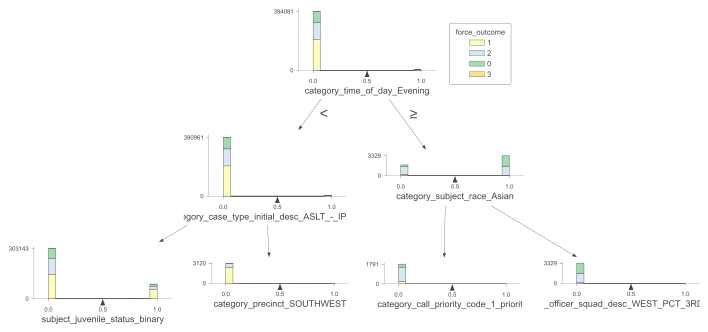

In [15]:
# Install fonts
!wget https://github.com/kavin808/arial.ttf/raw/master/arial.ttf
mpl.font_manager.fontManager.addfont('arial.ttf')
mpl.rc('font', family='arial')

# Tell dtreeviz about training data and model
crime_train_cols = crime_train.loc[:, crime_train.columns != target].columns.values.tolist()
crime_features = [f.name for f in model_rf.make_inspector().features()]
viz_cmodel = dtreeviz.model(model_rf,
                           tree_index=2,
                           X_train=crime_train.loc[:, crime_train.columns != target],
                           y_train=crime_train[target],
                           feature_names=crime_features,
                           target_name=target,
                           class_names=crime_train['force_outcome'].unique())

#viz_cmodel.view(fancy=False)
viz_cmodel.view(depth_range_to_display=(0,2)) # root is level 0